# 0. Imports

In [13]:
from config import config, colors
config = config.Configuration()
colors = colors.bcolors()
from patch_creation import show
show_logs = False

# 1.1 Patch Generation

In [35]:
if show_logs: print("1.2 Patch Generation")
%run "patch_creation.py"

1.2 Patch Generation


<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
patches_labels = np.load(config.path_patches_labels)
patches_satellite = np.load(config.path_patches_satellite)

# 1.2 Data Preparation

In [6]:
patches_labels.shape, patches_satellite.shape

((3672, 256, 256), (3672, 256, 256, 3))

Patch Sanity Check

Single Patch:


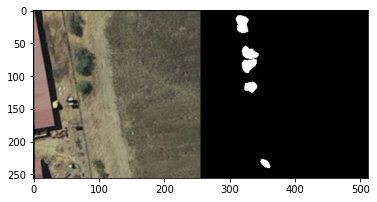

In [36]:
# visualize single patch
if show_logs: show(patches_satellite[0], patches_labels[0])

In [42]:
if show_logs: print("Shape of One Label and Satellite Patch:", patches_labels[0].shape, patches_satellite[0].shape)

Shape of One Label and Satellite Patch: (256, 256) (256, 256, 3)


Feature Scaling & Data Correction

In [7]:
# scale the color values
patches_satellite_train, patches_labels_train = [patch/255 for patch in patches_satellite], [patch/255 for patch in patches_labels]

Create Training and Test Dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(patches_satellite_train, patches_labels_train, test_size=config.test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=config.val_ratio, random_state=42)